In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
url = 'https://docs.google.com/spreadsheets/d/1bQ3sxkps9s6WeXpcnZspLU0GT4UewGE9/export?format=csv'
df = pd.read_csv(url)

df.head(10)


,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,5/2/2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,5/11/2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,7/11/2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


In [23]:
df.tail(10)

,Order Date,Segment,Market,Sales,Profit
51280,29-11-2014,Home Office,EMEA,34.128,-49.5720
51281,9/6/2014,Consumer,LATAM,84.000,9.2000
51282,28-12-2012,Home Office,LATAM,18.640,8.0000
51283,30-05-2014,Corporate,APAC,26.940,1.8600
51284,5/8/2014,Home Office,APAC,58.050,19.9500
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,2/12/2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [24]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [25]:
df.dtypes

Order Date     object
Segment        object
Market         object
Sales         float64
Profit        float64
dtype: object

In [26]:
#CHECKING FOR MISSING VALUES IN THE DATA FRAME 
df.isnull().values.any()

False

In [27]:
#CHECKING FOR TOTAL MISSING VALUES IN EACH COLUMN 
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [28]:
#CHECKING FOR MISSING VALUES IN THE ENTIRE DATAFRAME
df.isnull().sum().sum()

0

In [29]:
#CHECKING FOR ROWS WITH MISSING VALUES
df[df.isnull().any(axis=1)]

,Order Date,Segment,Market,Sales,Profit


In [30]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [31]:
df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [13]:
#CHECKING FOR TOTAL COUNT OF ALL THE DISTINCT MARKETS
market_counts=df.Market.value_counts()
market_counts

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

In [8]:
#CHECKING FOR TOTAL COUNT OF ALL THE DISTINCT SEGMENTS
segment_count=df.Segment.value_counts()
segment_count

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

**The largets market segment**

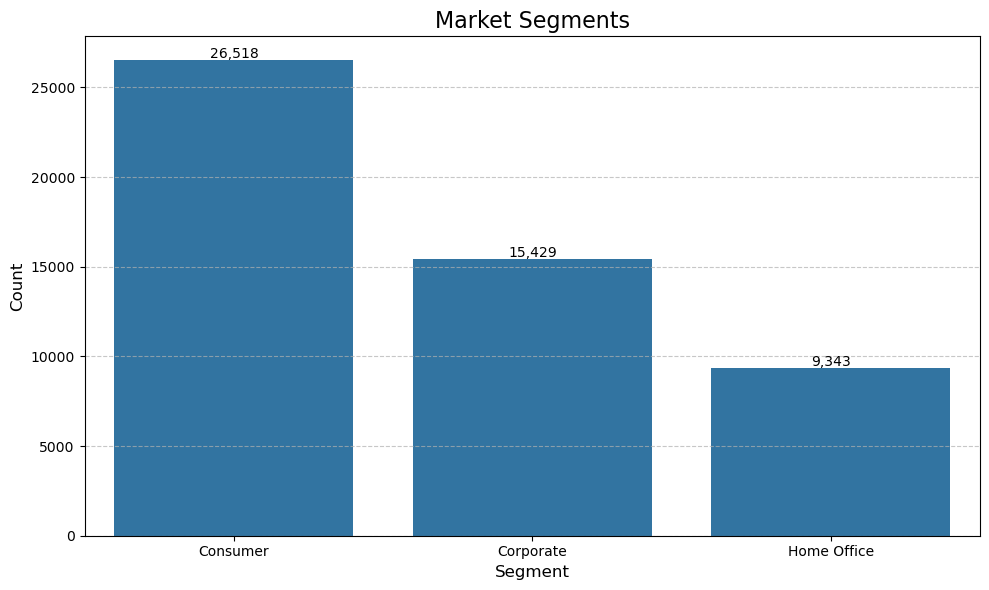

In [9]:
#CHECKING FOR THE LARGEST MARKET SEGMENT
segment_df = segment_count.reset_index()
segment_df.columns = ['Segment', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_df)
plt.title('Market Segments', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, count in enumerate(segment_df['Count']):
    plt.text(i, count + 100, f'{count:,}', ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Consumers formed the largest market segment for the giant store with a whooping 26,518 customers. the corporate segment of the Market was second with 15,429 total customers. The Home office market segment was third with 9,343 customers. 

**Largets Distinct Market**


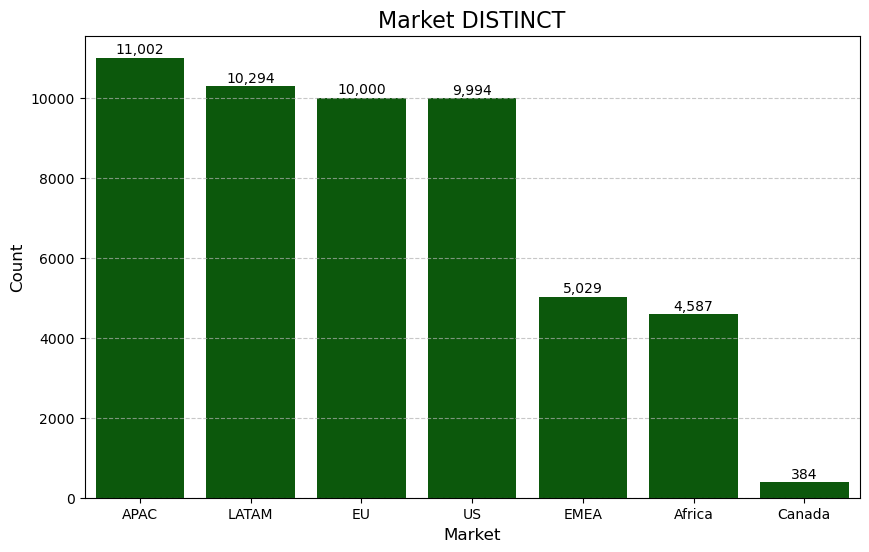

In [14]:
#CHECKING THE COUNT OF SPECIFIC MARKETS
market_df = market_counts.reset_index()
market_df.columns = ['Market', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Count', data=market_df,color='darkgreen')
plt.title('Market DISTINCT', fontsize=16)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, count in enumerate(market_df['Count']):
    plt.text(i, count + 100, f'{count:,}', ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The Asian and Pacific (APAC) market stands as the largest Distinct market for the retailer. On the other hand the company has a lot to do to bring in the Canadian Market into their influence. 

**profitable market**

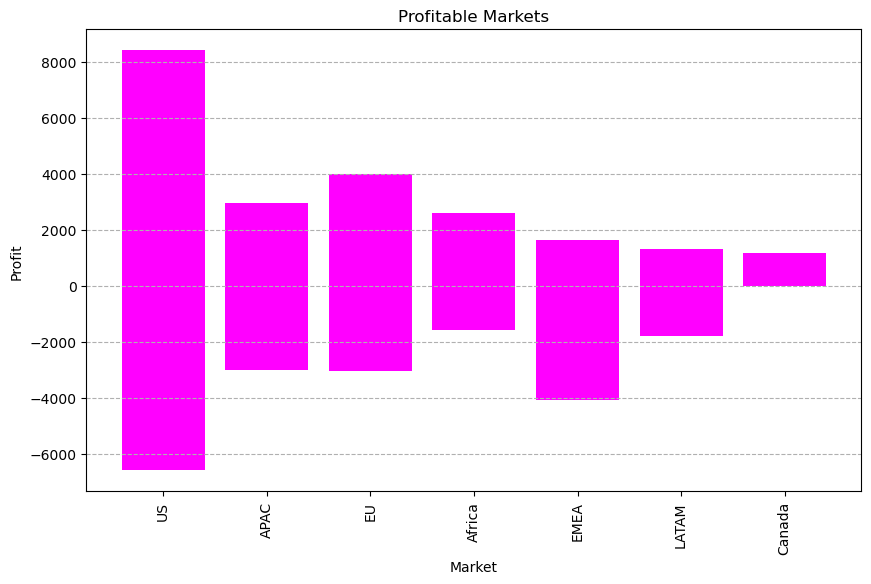

In [10]:
#PLOTTING THE MOST PROFITABLE MARKETS BASED ON THE PROFITS 
plt.figure(figsize=(10, 6))
plt.bar(df['Market'], df['Profit'], color='magenta')
plt.title('Profitable Markets')
plt.xlabel('Market')
plt.ylabel('Profit')
plt.xticks(rotation=90)  # rotate x labels if needed
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.show()

The US Market is the most profitable for the retail giant when it comes to profits accrued. The canadian Market still lags behind in the companys product usage. 

**Profitable Segment**

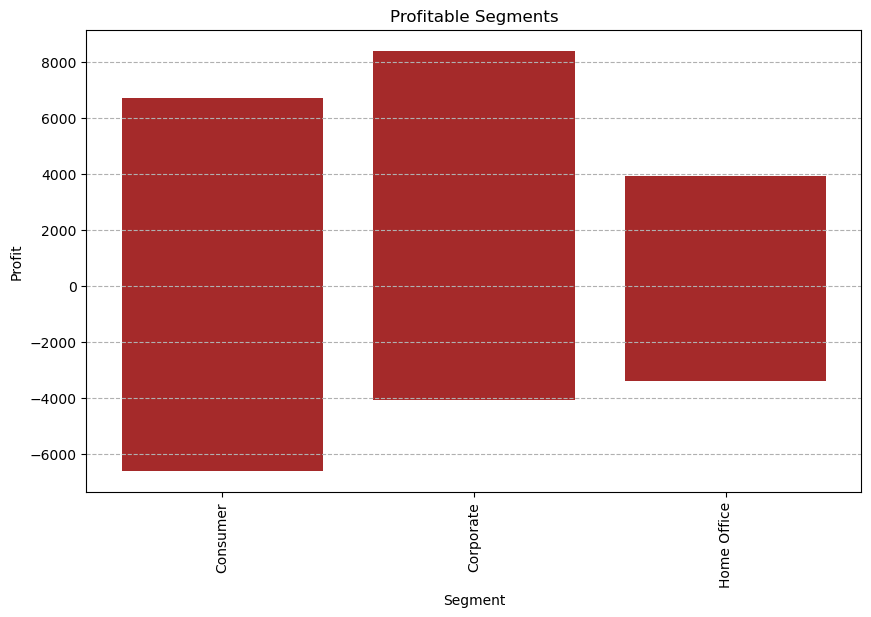

In [11]:
#CHECKING ON THE MOST PROFITABLE MARKET SEGMENTS BASED ON PROFITS ACCRUED 
plt.figure(figsize=(10, 6))
plt.bar(df['Segment'], df['Profit'], color='brown')
plt.title('Profitable Segments')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.xticks(rotation=90)  # rotate x labels if needed
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.show()

The Corporate Market segment remains to be the most profitable compared to the Home office and the Consumer.

**Create a new feature (market_segment) in the dataset that contains the geographical market_customer segment in the dataset e.g. values in this feature would look like US_Consumer, EU_Home Office**

In [16]:
new_df=pd.DataFrame(df)
new_df

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,5/2/2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,5/11/2013,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,2/12/2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000


In [20]:
#ADDING NEW COLUMN MARKET SEGMENT
new_df["Market_Segment"] = new_df[["Market", "Segment"]].apply(lambda x: "_".join(x), axis =1)
new_df=pd.DataFrame(new_df)
new_df

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,5/2/2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,5/11/2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer
...,...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000,APAC_Corporate
51286,20-06-2014,Consumer,US,0.444,-1.1100,US_Consumer
51287,2/12/2013,Home Office,US,22.920,11.2308,US_Home Office
51288,18-02-2012,Home Office,LATAM,13.440,2.4000,LATAM_Home Office


In [ ]:
new_df.describe()

In [21]:
#CHECKING FOR THE VALUE COUNTS IN THE NEW ADDED COLUMN
new_df['Market_Segment'].value_counts()

Market_Segment
APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: count, dtype: int64

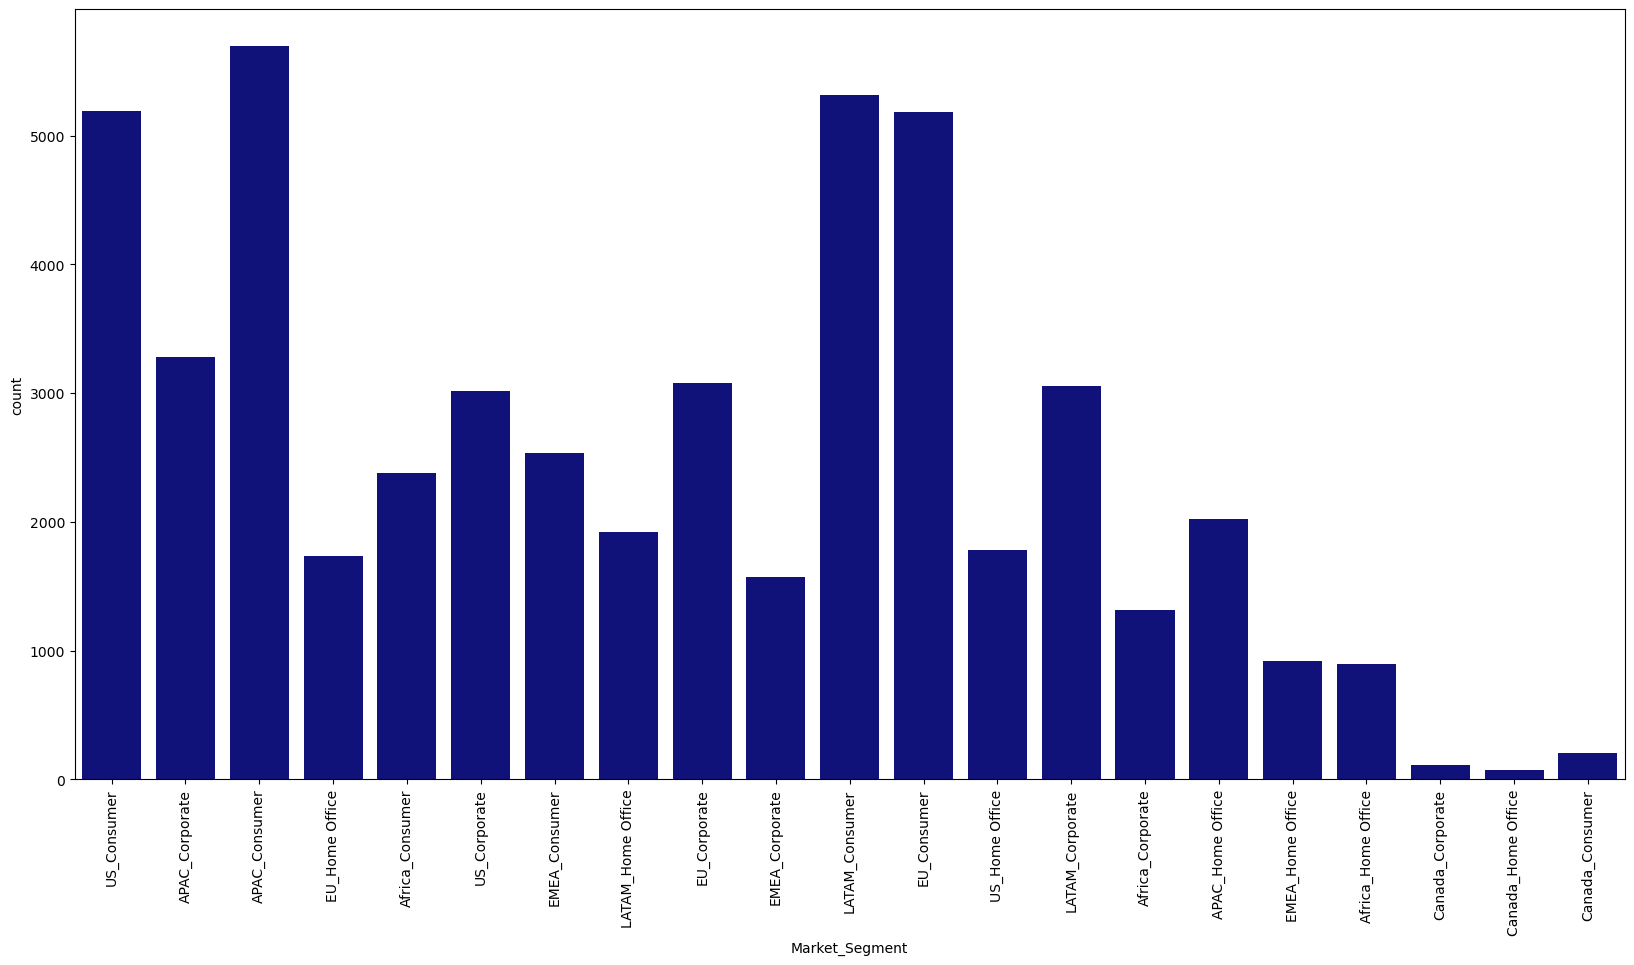

In [22]:
#VISUALIZE THE NEW SEGMENT AND THE VALUES
plt.figure(figsize=(20,10))
my_plot = sns.countplot(x = 'Market_Segment', data=new_df, color='darkblue')
# rotate x-axis labels
my_plot.set_xticks(my_plot.get_xticks())  # Ensure tick positions are fixed
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

plt.show()


The US_Consumer market will be more profitable for the retail giant should they embark on working with the combined consumer market segmentation mode. Consequently the company needs to work on the best ways of bringing in the canadian consumers into their grip. 
